In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("bodyfat.csv")
print(df.head())


   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [3]:
relevant_columns = ['Age', 'Weight', 'BodyFat']
print(df[relevant_columns].describe())

              Age      Weight     BodyFat
count  252.000000  252.000000  252.000000
mean    44.884921  178.924405   19.150794
std     12.602040   29.389160    8.368740
min     22.000000  118.500000    0.000000
25%     35.750000  159.000000   12.475000
50%     43.000000  176.500000   19.200000
75%     54.000000  197.000000   25.300000
max     81.000000  363.150000   47.500000


In [4]:
correlation_matrix = df.corr()
print(correlation_matrix)

pair_1 = ('Weight', 'BodyFat')
pair_2 = ('Age', 'BodyFat')


          Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097881 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450   
Weight  -0.594062  0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191   
Height   0.097881 -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892   
Neck    -0.472966  0.490592  0.113505  0.830716  0.253710  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894191  0.134892  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859   
Knee    -0.495040  0.508665  0.017516  0.853167  0.286053  0.672405  0.719496   
Ankle   -0.264890  0.265970 

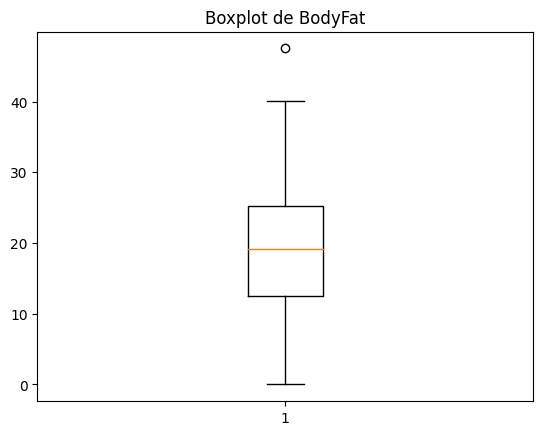

In [5]:
column_normal = 'BodyFat'
plt.boxplot(df[column_normal])
plt.title("Boxplot de BodyFat")
plt.show()

In [10]:
prob_age_gt_40 = len(df[df['Age'] > 40]) / len(df)
prob_bodyfat_gt_20 = len(df[df['BodyFat'] > 20]) / len(df)
prob_age_gt_40_and_bodyfat_gt_20 = len(df[(df['Age'] > 40) & (df['BodyFat'] > 20)]) / len(df)
prob_bodyfat_gt_20_given_age_gt_40 = prob_age_gt_40_and_bodyfat_gt_20 / prob_age_gt_40
print(prob_bodyfat_gt_20_given_age_gt_40)
print(prob_age_gt_40_and_bodyfat_gt_20)


0.55
0.3492063492063492


In [12]:
column_continuous_normal = 'Neck'
mean_neck = df[column_continuous_normal].mean()
std_neck = df[column_continuous_normal].std()
z_score = (45 - mean_neck) / std_neck
prob_neck_gt_45 = 1 - stats.norm.cdf(z_score)
print(prob_neck_gt_45)

0.0019705311344214715


In [13]:
column_A = 'BodyFat'
column_B = 'Abdomen'
df_filtered = df[df[column_B] >= 85]
t_statistic, p_value = stats.ttest_ind(df[column_A], df_filtered[column_A])
alpha = 0.05
if p_value < alpha:
    print("A média de A após a filtragem é significativamente diferente da média original.")
else:
    print("A média de A após a filtragem não é significativamente diferente da média original.")


A média de A após a filtragem é significativamente diferente da média original.


In [ ]:
Eu selecionaria pessoas de diversas regioes do brasil para que podessem representar o Brasil